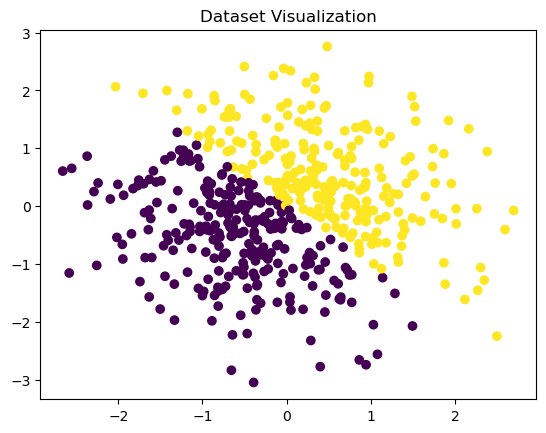

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset
np.random.seed(0)
n_samples = 500

# Generate features
X = np.random.randn(n_samples, 2)  # 500 samples, 2 features

# Generate labels (0 or 1)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Dataset Visualization")
plt.show()

Epoch 0, Loss: 0.8970
Epoch 100, Loss: 0.5571
Epoch 200, Loss: 0.3683
Epoch 300, Loss: 0.2618
Epoch 400, Loss: 0.2022
Epoch 500, Loss: 0.1655
Epoch 600, Loss: 0.1411
Epoch 700, Loss: 0.1237
Epoch 800, Loss: 0.1107
Epoch 900, Loss: 0.1007
Accuracy: 100.00%


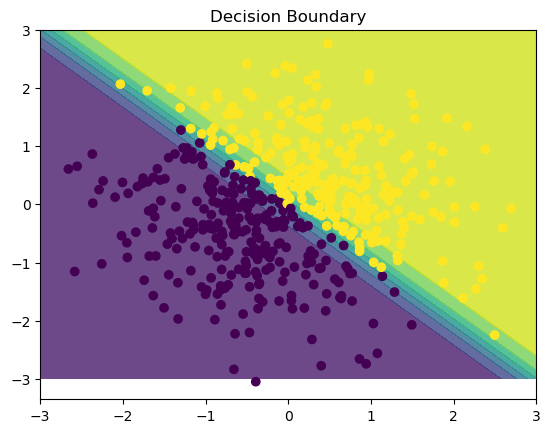

In [2]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def compute_loss(self, Y, A2):
        m = Y.shape[0]
        loss = -1/m * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
        return loss

    def backward(self, X, Y, A2, learning_rate=0.1):
        m = X.shape[0]

        # Calculate the gradient of the loss with respect to weights and biases
        dZ2 = A2 - Y
        dW2 = 1/m * np.dot(self.A1.T, dZ2)
        db2 = 1/m * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.A1)
        dW1 = 1/m * np.dot(X.T, dZ1)
        db1 = 1/m * np.sum(dZ1, axis=0, keepdims=True)

        # Update the weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, Y, epochs=1000, learning_rate=0.1):
        for epoch in range(epochs):
            # Forward propagation
            A2 = self.forward(X)

            # Compute the loss
            loss = self.compute_loss(Y, A2)

            # Backward propagation
            self.backward(X, Y, A2, learning_rate)

            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        A2 = self.forward(X)
        predictions = np.where(A2 > 0.5, 1, 0)
        return predictions

# One-hot encode labels for binary classification
Y = y.reshape(-1, 1)

# Initialize the neural network
input_size = 2  # Two input features
hidden_size = 4  # You can adjust the size of the hidden layer
output_size = 1  # Binary classification output

nn = SimpleNN(input_size, hidden_size, output_size)

# Train the neural network
nn.train(X, Y, epochs=1000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)

# Calculate accuracy
accuracy = np.mean(predictions == Y) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = nn.forward(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Decision Boundary")
plt.show()